In [36]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df_bigwine=pd.read_csv("df_out.csv")

df_bigwine['Rating'] = df_bigwine['Rating'].replace(0, np.nan)


df_bigwine = df_bigwine[df_bigwine['Vintage'] != "N.V."]

# Remove NaN
df_bigwine = df_bigwine.dropna(subset=['Vintage'])

# Step 1: Count occurrences for each year
country_counts = df_bigwine['Country'].value_counts()

# Step 2: Filter out years with less than 5 entries
valid_countries = country_counts[country_counts >= 50].index

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/2947621128.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.boxplot(x='Vintage', y=np.log(df_filtered['Price']),
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/2947621128.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/2947621128.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/2947621128.py:32: FutureWarning: 

Passing `palette` wi

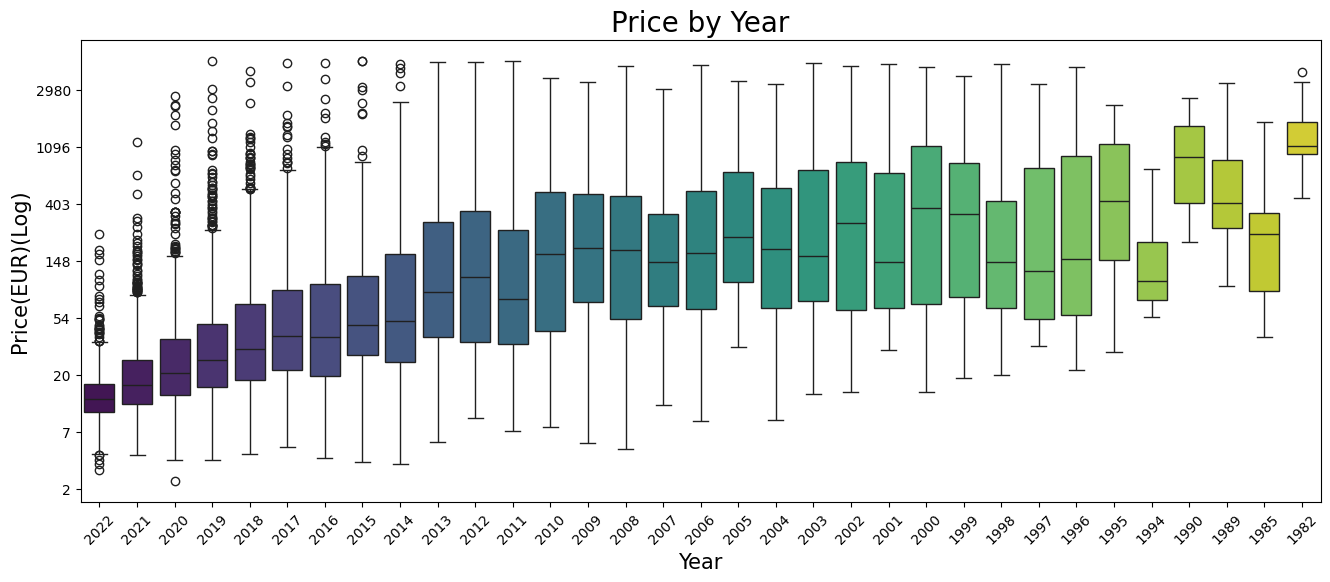

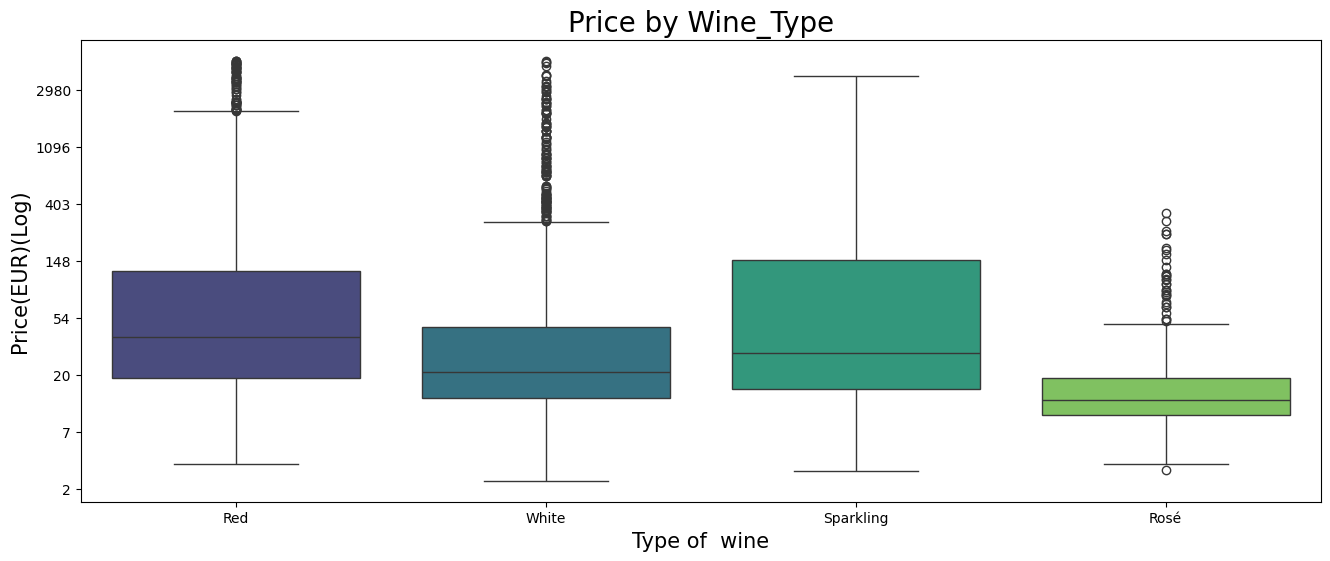

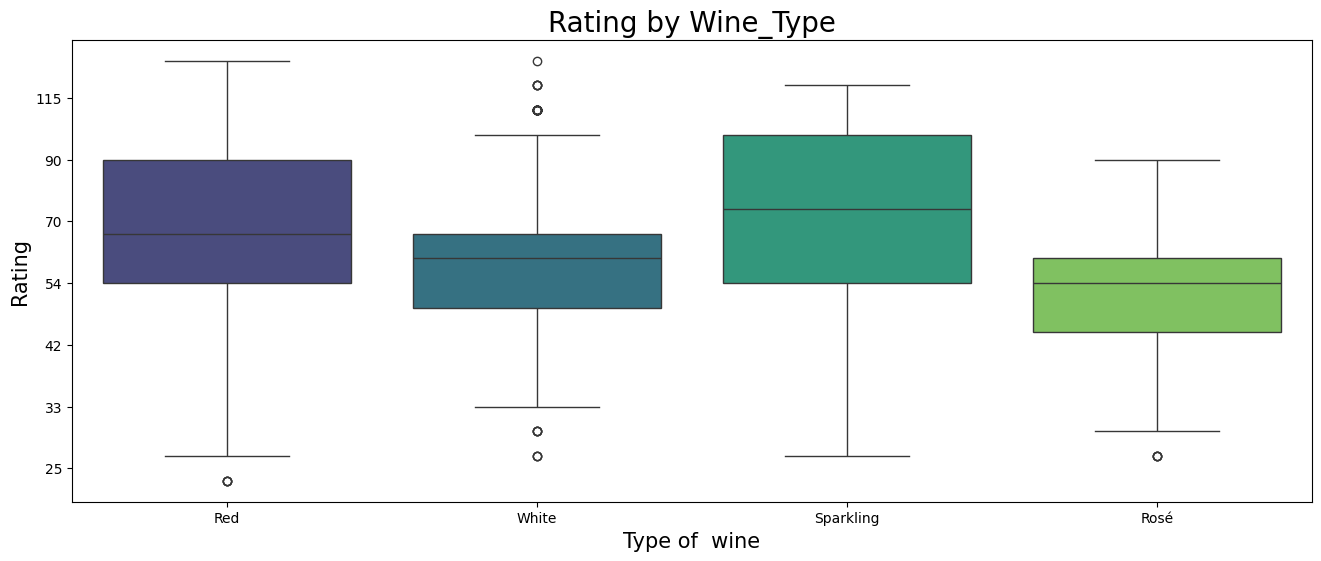

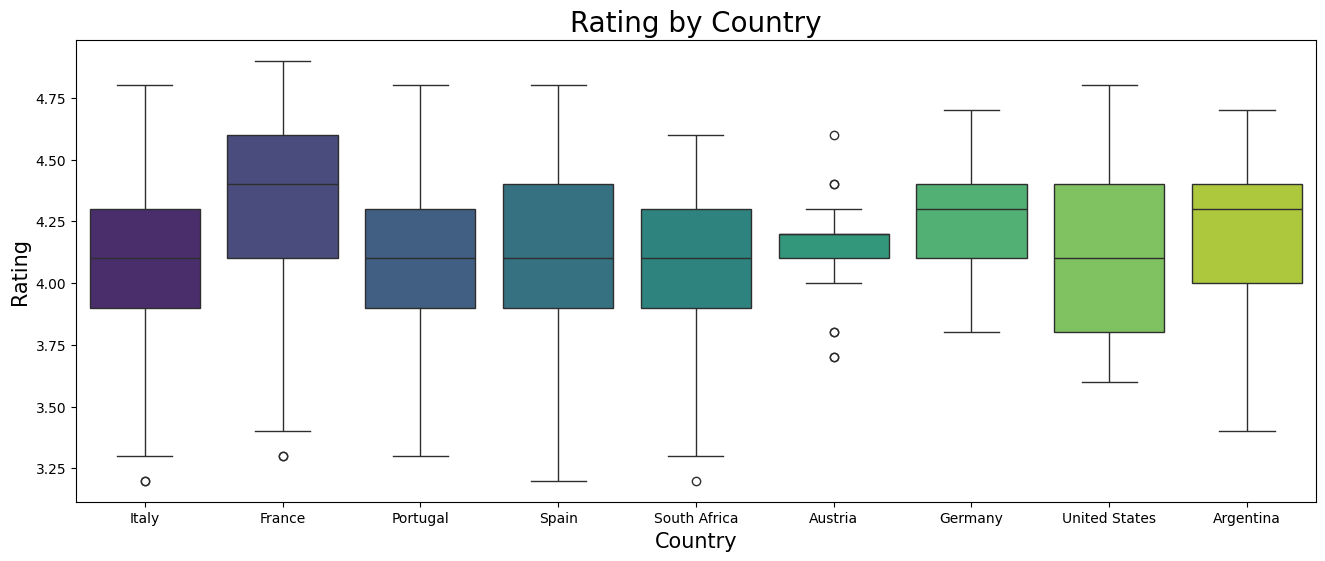

In [46]:


# Step 1: Count occurrences for each year
year_counts = df_bigwine['Vintage'].value_counts()

# Step 2: Filter out years with less than 5 entries
valid_years = year_counts[year_counts >= 10].index

# Step 3: Sort the remaining years in descending order
sorted_years = sorted(valid_years, reverse=True)

# Determine the 99th percentile of Price  THIS CAN PROBABLY BE MODIFIED WITHIN THE BOXPLOT SETTINGS AS WELL
cutoff_threshold = df_bigwine['Price'].quantile(0.99)

# Filter the DataFrame to exclude top 1% outliers
df_filtered = df_bigwine[df_bigwine['Price'] <= cutoff_threshold]


plt.figure(figsize=(16,6))
graph = sns.boxplot(x='Vintage', y=np.log(df_filtered['Price']),
                    data=df_filtered,
                    palette='viridis',
                    order=sorted_years)
graph.set_title("Price by Year", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Price(EUR)(Log)", fontsize=15)
#graph.set_yscale('log')
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))
plt.savefig('Price by Year.pdf')


plt.figure(figsize=(16,6))
graph1 = sns.boxplot(x='Wine_Type_ID', y=np.log(df_filtered['Price']),
                 data=df_filtered,
                 palette='viridis')
graph1.set_title("Price by Wine_Type", fontsize=20)
graph1.set_xlabel("Type of  wine", fontsize=15)
graph1.set_ylabel("Price(EUR)(Log)", fontsize=15)
graph1.set_xticklabels(["Red", "White", "Sparkling", "Rosé"])
graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))
plt.savefig('Price by Wine_Type.pdf')


plt.figure(figsize=(16,6))
graph1 = sns.boxplot(x='Wine_Type_ID', y='Rating',
                 data=df_filtered,
                 palette='viridis')
graph1.set_title("Rating by Wine_Type", fontsize=20)
graph1.set_xlabel("Type of  wine", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(["Red", "White", "Sparkling", "Rosé"])
graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))
plt.savefig('Rating by Wine_Type.pdf')

plt.figure(figsize=(16,6))
graph2 = sns.boxplot(x='Country', y=df_filtered['Rating'],
                 data=df_filtered,
                palette='viridis', order=valid_countries)
graph2.set_title("Rating by Country", fontsize=20)
graph2.set_xlabel("Country", fontsize=15)
graph2.set_ylabel("Rating", fontsize=15)
#graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))
# Offset every second x-axis tick label
#for i, label in enumerate(graph2.get_xticklabels()):
#    if i % 2 != 0:  # Offset every second label
#        label.set_y(label.get_position()[1] - 0.05)  # Adjust the offset value as needed

plt.savefig('Rating by Country.pdf')

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_yticklabels(graph1.get_yticks().astype(int))
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_yticklabels(graph1.get_yticks().astype(int))
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/1369827497.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

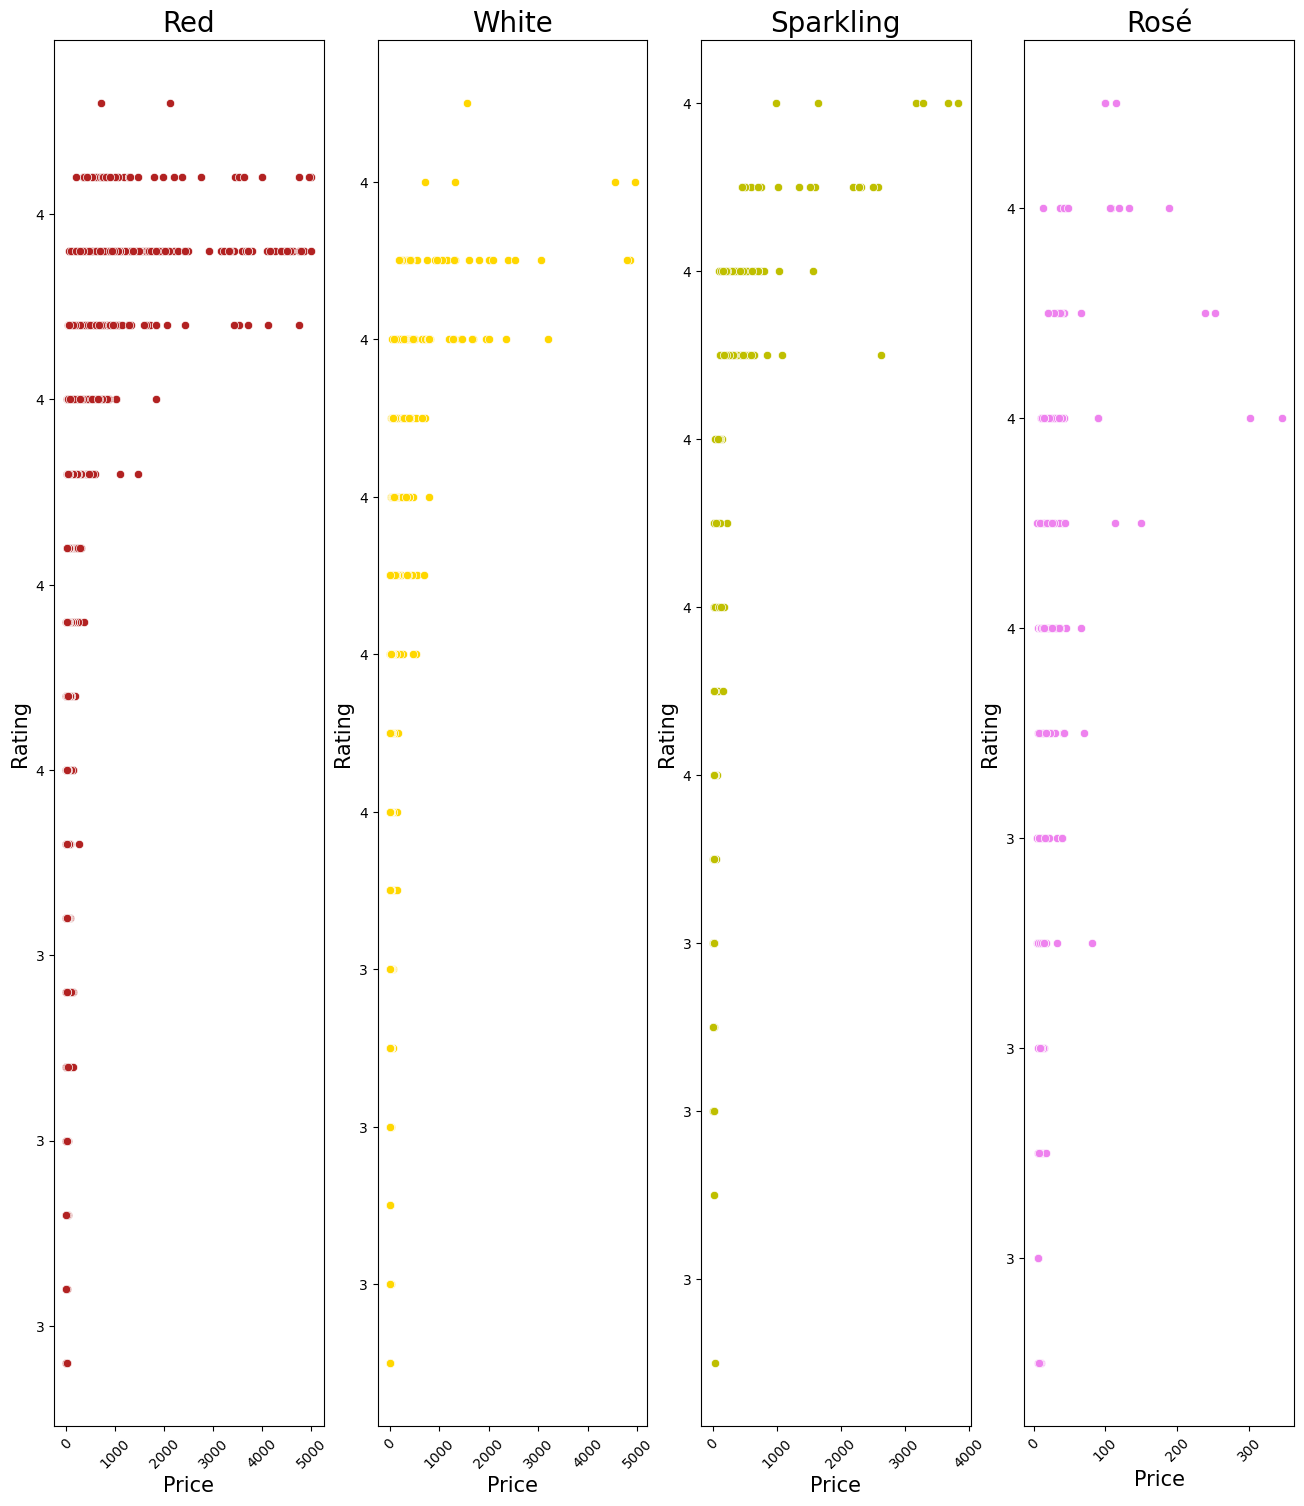

In [59]:
plt.figure(figsize=(16,18))
plt.subplot(1,4,1)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 1],
                 color="firebrick")
graph1.set_title("Red", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.subplot(1,4,2)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 2],
                 color="gold")
graph1.set_title("White", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.subplot(1,4,3)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 3],
                 color="y")
graph1.set_title("Sparkling", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.subplot(1,4,4)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 4],
                 color="violet")
graph1.set_title("Rosé", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.savefig('Rating by Price per Category.pdf')


In [62]:
df_filtered = df_filtered[df_filtered["Price"] < 500]

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/202311133.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/202311133.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_yticklabels(graph1.get_yticks().astype(int))


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/202311133.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/202311133.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_yticklabels(graph1.get_yticks().astype(int))
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/202311133.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_94306/202311133.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

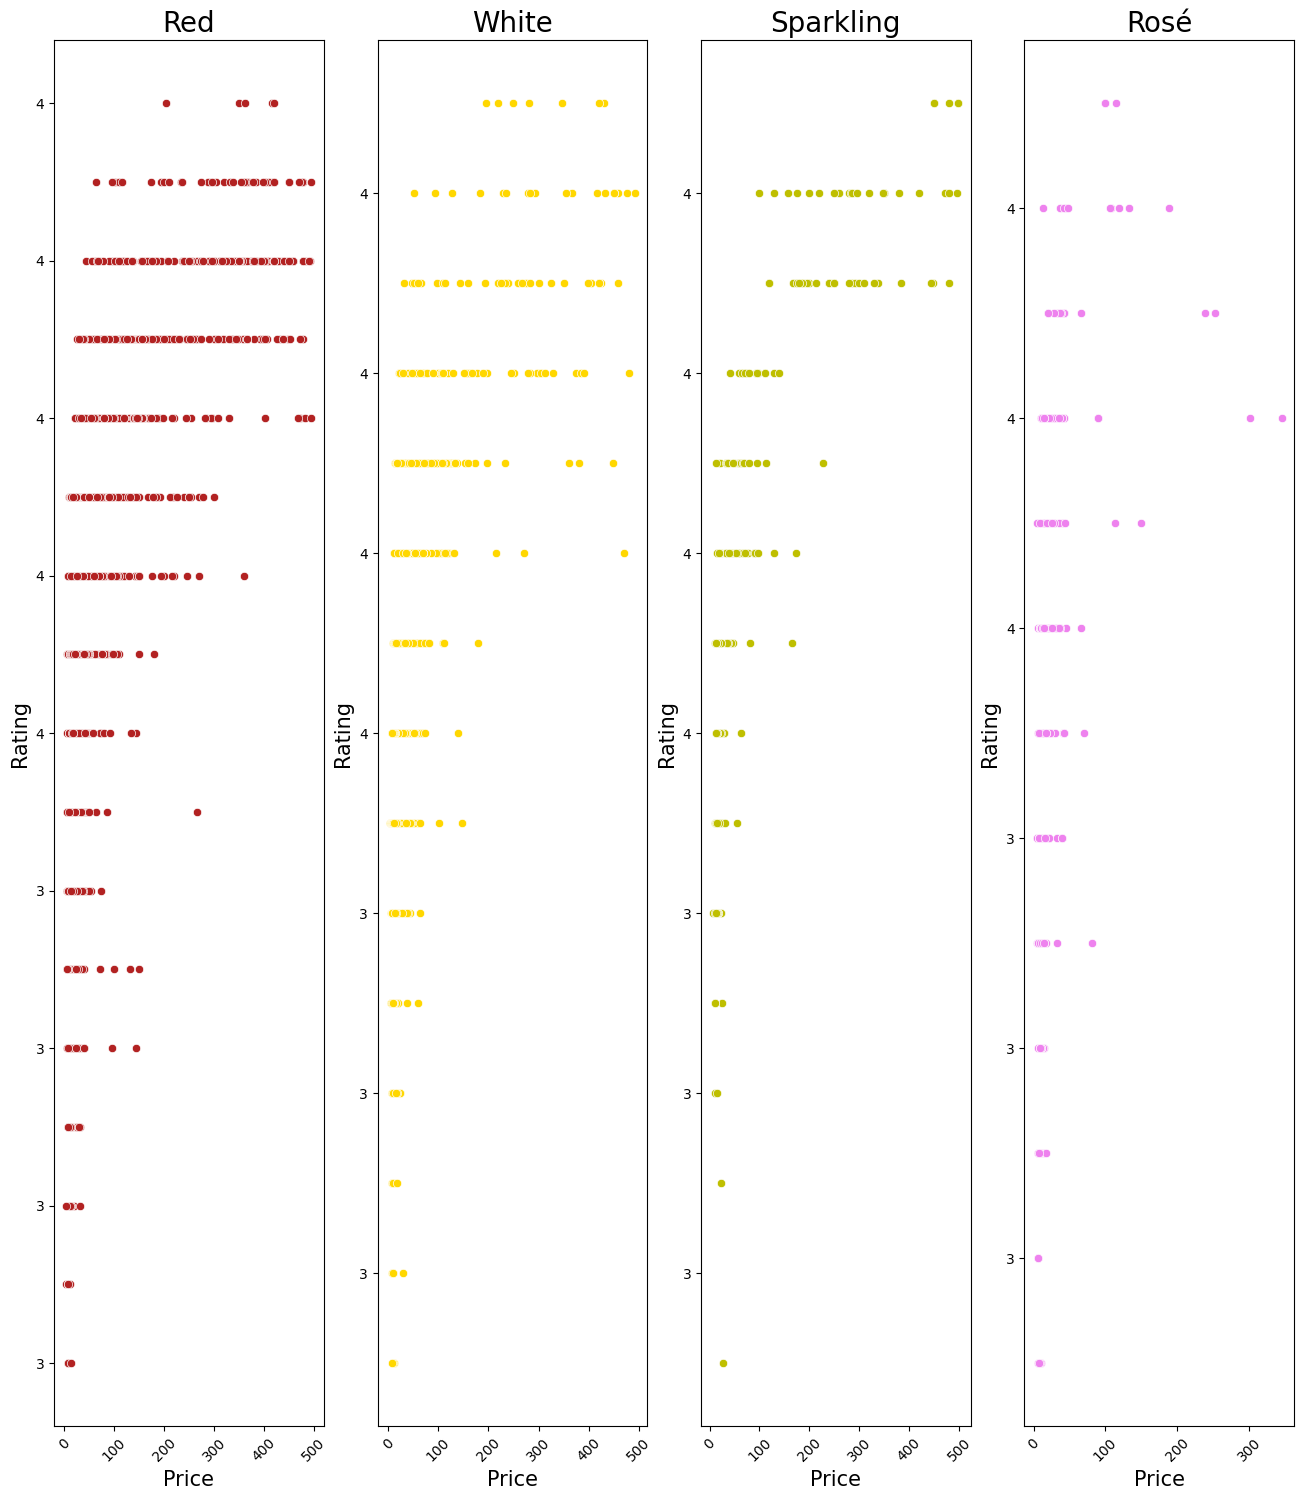

In [63]:
plt.figure(figsize=(16,18))
plt.subplot(1,4,1)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 1],
                 color="firebrick")
graph1.set_title("Red", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.subplot(1,4,2)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 2],
                 color="gold")
graph1.set_title("White", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.subplot(1,4,3)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 3],
                 color="y")
graph1.set_title("Sparkling", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.subplot(1,4,4)
graph1 = sns.scatterplot(x='Price', y='Rating',
                 data= df_filtered[df_filtered["Wine_Type_ID"] == 4],
                 color="violet")
graph1.set_title("Rosé", fontsize=20)
graph1.set_xlabel("Price", fontsize=15)
graph1.set_ylabel("Rating", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(graph1.get_yticks().astype(int))

plt.savefig('Rating by Price per Category(<500€).pdf')
